## Exercícios parte 3
### Mariana dos Santos Alves - 401280

1 - A Força que um campo magnético exerce sobre uma partícula de massma $m$ e carga $q$ que se move com velocidade $\vec{v}$ é dada por:

$$ \vec{F}_B = q (\vec{v} \times \vec{B}) $$

Sendo $\vec{F}_B$ a única força resultante sobre esta partícula, e sabendo que:

$$ \vec{a} \times \vec{b} = det\left(  \begin{array}{ccc}
\hat{i} & \hat{j} & \hat{k} \\
a_x & a_y & a_z \\
b_x & b_y & b_z \end{array} \right) $$

* 1.a - Escreva explicitamente as equações do movimento para $x$, $y$ e $z$, e para $v_x$, $v_y$ e $v_z$.

$$ \vec{F}_B = q (\vec{v} \times \vec{B}) = m \vec{a} $$ , com isso temos:

$$\frac{d^2 x}{d t^2} = \frac{q}{m}  (v_y B_z - v_z B_y)$$

$$\frac{d^2 y}{d t^2} = \frac{q}{m}  (v_z B_x - v_x B_z)$$

$$\frac{d^2 z}{d t^2} = \frac{q}{m}  (v_x B_y - v_y B_x)$$

aplicando integral, temos:

$$\frac{d x}{d t} = \frac{q}{m}  (y B_z - z B_y) + V_{x0}$$

$$\frac{d y}{d t} = \frac{q}{m}  (z B_x - x B_z) + V_{y0}$$

$$\frac{d z}{d t} = \frac{q}{m}  (x B_y - y B_x) + V_{z0}$$

Aplicando novamente integral, temos:

$$x = \frac{q}{m}  (\int y~dt B_z - \int z~dt B_y) + V_{x0}$$

$$y = \frac{q}{m}  (\int z~dt B_z - \int x~dt B_y) + V_{x0}$$

$$z = \frac{q}{m}  (\int x~dt B_z - \int y~dt B_y) + V_{x0}$$

* 1.b - Determine a versão discretizada destas equações.

$$X_{i+1} = X_i + V_{x, i} \Delta t$$

$$Y_{i+1} = Y_i + V_{y, i} \Delta t$$

$$Z_{i+1} = Z_i + V_{z, i} \Delta t$$

$$V_{x, i+1} = V_{x, i} +   \frac{\Delta t q}{m} [V_y B_z - V_z B_y]$$

$$V_{y, i+1} = V_{y, i} +   \frac{\Delta t q}{m} [V_z B_x - V_x B_z]$$

$$V_{z, i+1} = V_{z, i} +   \frac{\Delta t q}{m} [V_x B_y - V_y B_x]$$

* 1.c - Assumindo que $\vec{v}_0 = (v_{0x},v_{0y},v_{0z})$, $\vec{r}_0 = (x_{0},y_{0},z_{0})$ e $\vec{B} = (0,0,B)$, encontre a solução analítica deste problema.

In [27]:
#carregando as bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [28]:
#definindo a função
def projéteis_em_3D(t,r,v0,b,q,m,gama=0):
    
    #encontra o número de etapas no tempo
    nsteps = len(t)  
    dt = t[1]-t[0]
    
    # criação da matriz    
    x  = np.zeros(nsteps)  # matriz de codernada x   
    y  = np.zeros(nsteps)  # matriz de codernada y 
    z  = np.zeros(nsteps)  # matriz de codernada z     
    vx = np.zeros(nsteps)  # matriz de componente vx com resistência  
    vy = np.zeros(nsteps)  # matriz de componente vy com resistência
    vz = np.zeros(nsteps)  # matriz de componente vz com resistência

    # condições iniciais    
    x[0]  = r[0]
    y[0]  = r[1]
    z[0]  = r[2] 
    vx[0] = v0[0]
    vy[0] = v0[1]
    vz[0] = v0[2]
    
    bx = b[0]
    by = b[1]
    bz = b[2]

    # loop iniciando na segunda posição da matriz     
    for i in range(1,nsteps):
        vx[i] = dt*(q/m)*(vy[i-1]*bz-vz[i-1]*by)+vx[i-1]*(1-dt*gama)
        vy[i] = dt*(q/m)*(vz[i-1]*bx-vx[i-1]*bz)+vy[i-1]*(1-dt*gama)
        vz[i] = dt*(q/m)*(vx[i-1]*by-vy[i-1]*bx)+vz[i-1]*(1-dt*gama)
        x[i]  = x[i-1] + vx[i]*dt
        y[i]  = y[i-1] + vy[i]*dt
        z[i]  = z[i-1] + vz[i-1]*dt
    
    return x,y,z,vx,vy,vz

In [29]:
# definindo a função
def solução_analítica(time, r, v0, B, fi=0, gama=0):
    
    # encontra o número de etapas no tempo
    nsteps = len(time)  
    dt = time[1]-time[0]
    
    fi = np.pi*(fi/180)
    x  = np.zeros(nsteps)  # matriz de codernada x    
    y  = np.zeros(nsteps)  # matriz de codernada y 
    z  = np.zeros(nsteps)  # matriz de codernada z     
    vx = np.zeros(nsteps)  # matriz de componente vx com resistência  
    vy = np.zeros(nsteps)  # matriz de componente vy com resistência
    vz = np.zeros(nsteps)  # matriz de componente vz com resistência
    v  = np.zeros(nsteps)

    # condições iniciais
    x[0]  = r[0]
    y[0]  = r[1]
    z[0]  = r[2] 
    vx[0] = v0[0]
    vy[0] = v0[1]
    vz[0] = v0[2]
    v = np.sqrt(vx[0]**2 + vy[0]**2)
    
    b = B[2]

    w = b*q/m
    
    for t in range(1, nsteps):
        vx[t] = -v*np.sin((w*time[t])+fi)
        vy[t] = -v*np.cos((w*time[t])+fi)
        
        x[t] = x[0]-vy[t]/w
        y[t] = y[0]+vx[t]/w
        
        if gama!=0:
            z[t] = z[0]*np.e**(-2*gama*time[t])
        else:
            z[t] = vz[0]*time[t]
            
   
    print(x)
    print(y)
            
    return x, y, z

2 - Modifique o código do movimento de projéteis em 3D para calcular numericamente o problema descrito acima assumindo o caso mais geral possível onde o vetor $\vec{B}$ pode ter componentes não nulas nas três direções.

* 2.a - Resolve o problema numérico assumindo $q = m = 1$, $\vec{r}_0 = (1,0,0)$, $\vec{v}_0 = (0,1,0)$ e $\vec{B} = (0,0,1)$, e plote a trajetória. Compare o resultado com a solução analítica.

[1.         1.99999687 1.9999875  ... 1.9905286  1.9908688  1.99120281]
[ 0.         -0.00250025 -0.00500048 ...  0.13730658  0.13482959
  0.13235175]


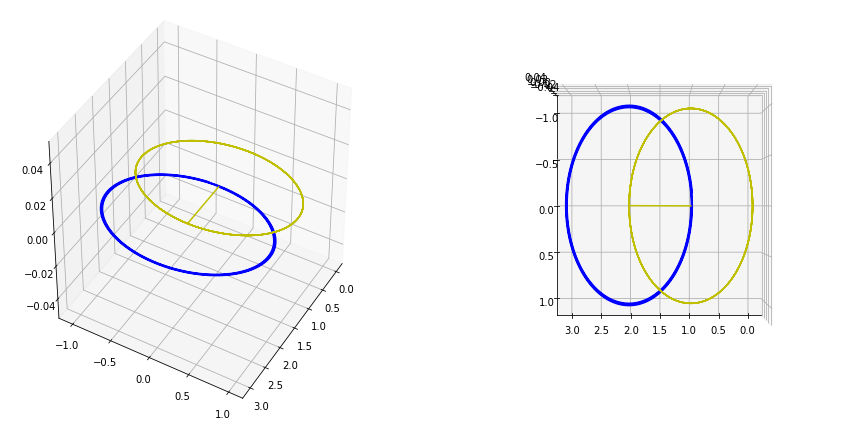

In [34]:
#dados da questão
r = [1,0,0]
v0 = [0,1,0]
b = [0,0,1]
m = 1
q = 1
Tmax = 25
nt = 10000

# etapas no tempo t_i 
time = np.linspace(0,Tmax,nt)

# calculando com a resistência do ar
xn,yn,zn,vx,vy,vz = projéteis_em_3D(time,r,v0,b,q,m)
xa, ya, za = solução_analítica(time, r, v0, b)

fig = plt.figure(figsize=(15, 7.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ay = fig.add_subplot(1, 2, 2, projection='3d')

# visão oblíqua
ax.plot(xn, yn, zn, 'b')
ax.plot(xa, ya, za, 'y')
ax.view_init(elev=40., azim=30) 

# visão superior
ay.plot(xn, yn, zn, 'b')
ay.plot(xa, ya, za, 'y')
ay.view_init(elev=90., azim=90) 
plt.show()

* 2.b - Resolve o problema numérico assumindo $q = m = 1$, $\vec{r}_0 = (1,0,0)$, $\vec{v}_0 = (0,1/\sqrt{2},1/\sqrt{2})$ e $\vec{B} = (0,0,1)$, e plote a trajetória. Explique a diferença de trajetória entre os itens 2.a e 2.b.

[1.         1.70710457 1.70709794 ... 1.70040949 1.70065005 1.70088623]
[ 0.         -0.00176794 -0.00353587 ...  0.09709042  0.09533892
  0.09358682]


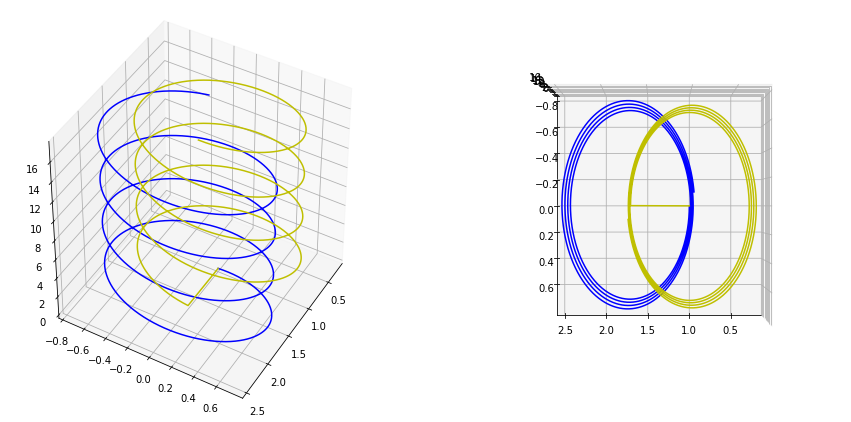

In [35]:
# dados da questão
r = [1,0,0]
v0 = [0,1/np.sqrt(2),1/np.sqrt(2)]
b = [0,0,1]
m = 1
q = 1
Tmax = 25
nt = 10000

# etapas no tempo t_i
time = np.linspace(0,Tmax,nt)

# calculando com a resistência do ar
xn,yn,zn,vx,vy,vz = projéteis_em_3D(time,r,v0,b,q,m)
xa,ya,za = solução_analítica(time, r, v0, b)

fig = plt.figure(figsize=(15, 7.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ay = fig.add_subplot(1, 2, 2, projection='3d')

# visão oblíqua
ax.plot(xn, yn, zn, 'b')
ax.plot(xa, ya, za, 'y')
ax.view_init(elev=40., azim=30) 

# visão superior
ay.plot(xn, yn, zn, 'b')
ay.plot(xa, ya, za, 'y')
ay.view_init(elev=90., azim=90) 
plt.show()

3 - Inclua a agora na sua equação diferencial um termo de atrito de forma que a força resultante sobre a partícula seja:

$$\vec{F}_R = \vec{F}_B - \gamma \vec{v}$$

Note que este modelo de atrito é mais simples que o modelo devido a resistência do ar. Descreva explicitamente as equações diferencias discretizadas para este problema

* 3.a - Repita o problema 2.a incluindo o termo de atrito com $\gamma = 0.1$. Plote as duas trajetórias e explique o resultado. 


In [32]:
# condições da questão
r = [1,0,0]
v0 = [0,1/np.sqrt(2),1/np.sqrt(2)]
b = [0,0,1]
m = 1
q = 1
Tmax = 25
nt = 10000
gama=0.1

# etapas no tempo t_i
time = np.linspace(0,Tmax,nt)

# calculando com a resistência do ar
xn,yn,zn,vx,vy,vz,v = projéteis_em_3D(time,r,v0,b,q,m, gama)
#xa, ya, za = solução_analítica(time, r, v0, gama)

fig = plt.figure(figsize=(15, 7.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ay = fig.add_subplot(1, 2, 2, projection='3d')

# visão oblíqua
ax.plot(xn, yn, zn, 'b')
ax.view_init(elev=40., azim=30) 

# visão superior
ay.plot(xn, yn, zn, 'b')
ay.view_init(elev=90., azim=90)
plt.show()

ValueError: not enough values to unpack (expected 7, got 6)